## Aluno: Roberto Okada - RM 333469

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [2]:
# resposta 1

import pandas as pd
import numpy as np

house_prices = pd.read_csv(r"house_prices.csv", sep=';')

house_prices.describe()

,tamanho,n_quartos,idade,preco
count,49.000000,49.000000,48.000000,50.000000
mean,1990.693878,3.142857,23.500000,337783.700000
std,782.736152,0.763763,25.304108,122946.740155
min,852.000000,1.000000,2.000000,169900.000000
25%,1427.000000,3.000000,9.750000,249892.500000
50%,1888.000000,3.000000,18.000000,299900.000000
75%,2238.000000,4.000000,32.000000,392175.000000
max,4478.000000,5.000000,170.000000,699900.000000


In [3]:
print("Valores faltantes")
print(house_prices.isna().sum())

house_prices.dropna(inplace=True)
print("\nSem valores faltantes")
print(house_prices.isna().sum())

Valores faltantes
tamanho      1
n_quartos    1
idade        2
preco        0
dtype: int64

Sem valores faltantes
tamanho      0
n_quartos    0
idade        0
preco        0
dtype: int64


In [4]:
print("Valores duplicados")
print(house_prices[house_prices.duplicated()])

house_prices.drop_duplicates(keep='first', inplace=True)
print("\nSem valores duplicados")
print(house_prices[house_prices.duplicated()])

Valores duplicados
   tamanho  n_quartos  idade   preco
1   2104.0        3.0   45.0  399900

Sem valores duplicados
Empty DataFrame
Columns: [tamanho, n_quartos, idade, preco]
Index: []


In [5]:
house_prices.describe()

,tamanho,n_quartos,idade,preco
count,46.000000,46.000000,46.000000,46.000000
mean,2005.760870,3.173913,23.239130,342315.108696
std,802.711936,0.768963,25.620465,125731.986959
min,852.000000,1.000000,2.000000,169900.000000
25%,1429.500000,3.000000,9.250000,249900.000000
50%,1889.000000,3.000000,18.000000,306950.000000
75%,2284.500000,4.000000,31.500000,392175.000000
max,4478.000000,5.000000,170.000000,699900.000000


## 2) Há outliers no data set? Se sim, trate-os de forma adequada

Outliers de 'tamanho'


,tamanho,n_quartos,idade,preco
14,4478.0,5.0,22.0,699900
26,3890.0,3.0,12.0,573900
41,4215.0,4.0,15.0,549000


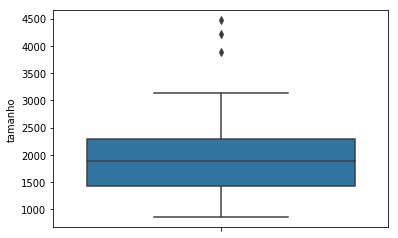

In [6]:
# resposta 2

import seaborn as sns

# verificando todos outliers pelo método IQR
Q1 = house_prices.quantile(0.25)
Q3 = house_prices.quantile(0.75)
IQR = Q3 - Q1
is_outlier = (house_prices < (Q1 - 1.5 * IQR))| (house_prices > (Q3 + 1.5 * IQR))


# analise de outliers na coluna 'tamanho' 
sns.boxplot(y=house_prices['tamanho'])

print("Outliers de 'tamanho'")
house_prices[is_outlier['tamanho']]

Outliers de 'n_quartos'


,tamanho,n_quartos,idade,preco
33,1000.0,1.0,36.0,169900


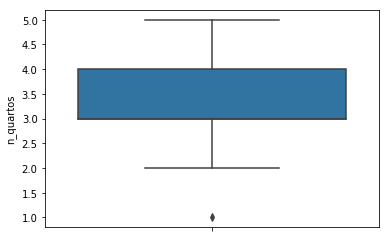

In [7]:
# analise de outliers na coluna 'n_quartos' 
sns.boxplot(y=house_prices['n_quartos'])

print("Outliers de 'n_quartos'")
house_prices[is_outlier['n_quartos']]

Outliers de 'idade'


,tamanho,n_quartos,idade,preco
23,1604.0,3.0,170.0,242900


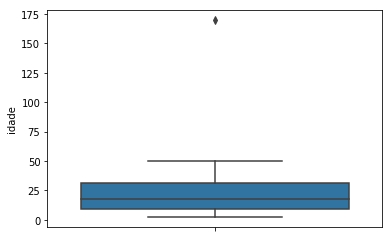

In [8]:
# analise de outliers na coluna 'idade' 
sns.boxplot(y=house_prices['idade'])

print("Outliers de 'idade'")
house_prices[is_outlier['idade']]

Outliers de 'preco'


,tamanho,n_quartos,idade,preco
14,4478.0,5.0,22.0,699900


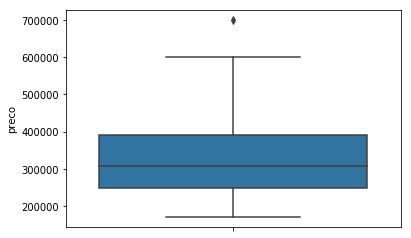

In [9]:
# analise de outliers na coluna 'preco' 
sns.boxplot(y=house_prices['preco'])

print("Outliers de 'preco'")
house_prices[is_outlier['preco']]

In [10]:
#retirando todos outliers
house_prices_new = house_prices.drop(house_prices.index[is_outlier['tamanho']|is_outlier['n_quartos']|is_outlier['idade']|is_outlier['preco']], axis=0)

In [11]:
house_prices_new.describe()

,tamanho,n_quartos,idade,preco
count,41.000000,41.000000,41.000000,41.000000
mean,1879.951220,3.170732,19.853659,329534.024390
std,561.929976,0.667175,13.389475,104983.197411
min,852.000000,2.000000,2.000000,179900.000000
25%,1427.000000,3.000000,8.000000,249900.000000
50%,1888.000000,3.000000,18.000000,299900.000000
75%,2200.000000,4.000000,30.000000,368500.000000
max,3137.000000,4.000000,50.000000,599000.000000


## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [12]:
# resposta 3
import numpy as np

house_prices_new['n_andares'] = np.random.choice([1, 2], house_prices_new.shape[0])
house_prices_new.head()

,tamanho,n_quartos,idade,preco,n_andares
0,2104.0,3.0,45.0,399900,2
2,1600.0,3.0,30.0,329900,1
3,2400.0,3.0,32.0,369000,2
4,1416.0,2.0,10.0,232000,2
5,3000.0,4.0,14.0,539900,2


## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

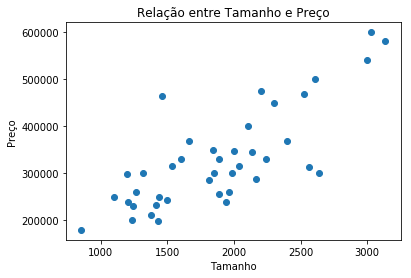

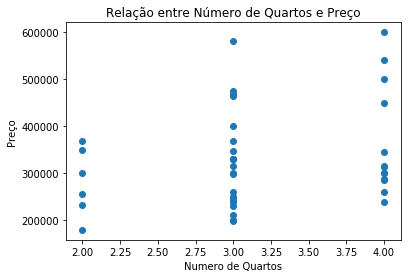

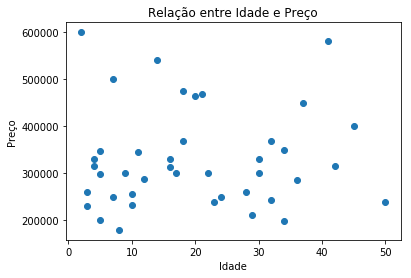

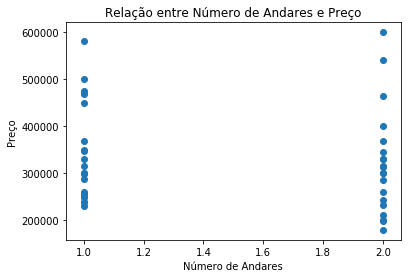

In [13]:
# resposta 4

import matplotlib.pyplot as plt

grTamanho = plt.scatter(house_prices_new['tamanho'], house_prices_new['preco'])
plt.xlabel('Tamanho')
plt.ylabel('Preço')
plt.title("Relação entre Tamanho e Preço")
plt.show()
grNQuartos = plt.scatter(house_prices_new['n_quartos'], house_prices_new['preco'])
plt.xlabel('Numero de Quartos')
plt.ylabel('Preço')
plt.title("Relação entre Número de Quartos e Preço")
plt.show()
grIdade = plt.scatter(house_prices_new['idade'], house_prices_new['preco'])
plt.xlabel('Idade')
plt.ylabel('Preço')
plt.title("Relação entre Idade e Preço")
plt.show()
grNAndares = plt.scatter(house_prices_new['n_andares'], house_prices_new['preco'])
plt.xlabel('Número de Andares')
plt.ylabel('Preço')
plt.title("Relação entre Número de Andares e Preço")

plt.show()

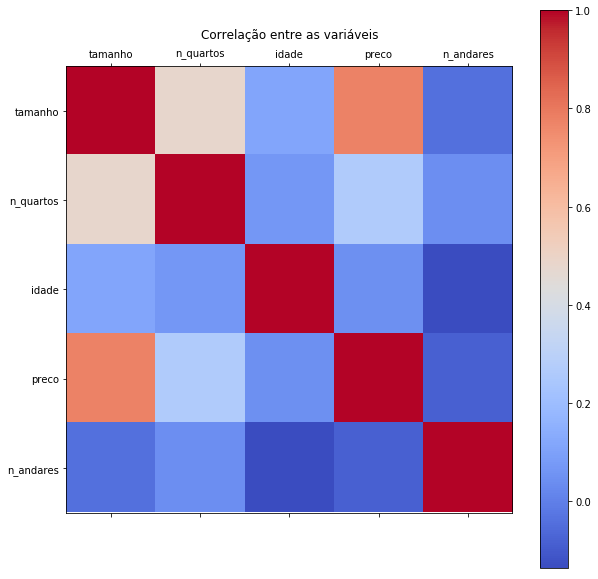

In [15]:
#Correlação
fig = plt.figure(figsize=(10, 10))
plt.matshow(house_prices_new.corr(), fignum=fig.number, cmap='coolwarm')
plt.xticks(range(house_prices_new.shape[1]), house_prices_new.columns, fontsize=10)
plt.yticks(range(house_prices_new.shape[1]), house_prices_new.columns, fontsize=10)
cb = plt.colorbar()
plt.title('Correlação entre as variáveis')
cb.ax.tick_params(labelsize=10)

plt.show()

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [16]:
# resposta 5

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    house_prices_new.drop(['preco'], axis = 1),
    house_prices_new['preco'],
    test_size=0.30,
    random_state=1
)

In [17]:
x_train.describe()

,tamanho,n_quartos,idade,n_andares
count,28.000000,28.000000,28.000000,28.000000
mean,1872.107143,3.285714,20.107143,1.535714
std,524.899450,0.599824,14.035245,0.507875
min,1200.000000,2.000000,2.000000,1.000000
25%,1415.250000,3.000000,5.000000,1.000000
50%,1871.000000,3.000000,17.500000,2.000000
75%,2171.500000,4.000000,30.500000,2.000000
max,3031.000000,4.000000,50.000000,2.000000


In [18]:
x_test.describe()

,tamanho,n_quartos,idade,n_andares
count,13.000000,13.000000,13.000000,13.000000
mean,1896.846154,2.923077,19.307692,1.384615
std,657.403586,0.759555,12.405541,0.506370
min,852.000000,2.000000,7.000000,1.000000
25%,1437.000000,2.000000,10.000000,1.000000
50%,1888.000000,3.000000,18.000000,1.000000
75%,2400.000000,3.000000,24.000000,2.000000
max,3137.000000,4.000000,42.000000,2.000000


## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [19]:
# resposta 6

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train.ravel())

y_train_predict = lr.predict(x_train)

err_train = math.sqrt(mean_squared_error(y_train,y_train_predict))
err_train

58231.29491727518

## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? 

In [20]:
# resposta 7

y_test_predict = lr.predict(x_test)
err_test = math.sqrt(mean_squared_error(y_test,y_test_predict))
err_test

76788.84170043719

In [21]:
house_prices_compare=[]
house_prices_compare = x_test
house_prices_compare['preco_teste'] = y_test
house_prices_compare['preco_previsto'] = y_test_predict
house_prices_compare

,tamanho,n_quartos,idade,n_andares,preco_teste,preco_previsto
4,1416.0,2.0,10.0,2,232000,294001.418098
3,2400.0,3.0,32.0,2,369000,402316.841608
29,2526.0,3.0,21.0,1,469000,441052.538026
47,852.0,2.0,8.0,2,179900,203518.300448
19,2609.0,4.0,7.0,1,499998,427732.140716
35,3137.0,3.0,41.0,1,579900,526620.258358
22,1888.0,2.0,10.0,1,255000,381420.293566
43,1664.0,2.0,18.0,1,368500,339341.356073
37,1437.0,3.0,7.0,1,249900,273424.188563
28,1458.0,3.0,20.0,2,464500,257239.046418
